# Batch Gradient Descent (BGD)

## Theoretical Approach

Batch Gradient Descent distinguishes itself by computing the gradient using the **entire training dataset** $\mathcal{D}$ for every single iteration of the optimization process. This contrasts with stochastic methods that approximate the gradient using subsets of data. Given a dataset of size $N$, the algorithm calculates the exact gradient of the global cost function, ensuring the update vector points in the direction of the steepest descent for the total error surface.

## Mathematical Formulation

### 1. Global Cost Function
The cost function $J(\theta)$ is defined as the average loss over the total number of samples $N$ in the dataset:

$$
J(\theta) = \frac{1}{N} \sum_{i=1}^{N} \mathcal{L}(\hat{y}^{(i)}, y^{(i)}) = \frac{1}{2N} \sum_{i=1}^{N} (\hat{y}^{(i)} - y^{(i)})^2
$$

### 2. The Batch Gradient
The gradient used for the update step is the average of the partial derivatives calculated for every sample in the dataset. The summation runs from $1$ to $N$:

$$
\nabla_\theta J(\theta) = \frac{1}{N} \sum_{i=1}^{N} \nabla_\theta \mathcal{L}(\hat{y}^{(i)}, y^{(i)})
$$

### Libraries Import

In [192]:
import numpy as np
import matplotlib.pyplot as plt

### Initial Configuration

In [193]:
# Defining target function for approximation
target_function = lambda x: np.sin(x)

# Data generation
domain_start = 0.0
domain_end = 4 * np.pi
sample_size = 200

# Network hyperparameters
hidden_neurons = 32
learning_rate = 0.03
intermediate_generations = 50000
total_generations = 200000

# Activation function
activation_function = "sigmoid"

# Seed for Reproducibility
np.random.seed(42)

### Activation Functions

In [194]:
# Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_d(x):
    s = sigmoid(x)
    return s * (1 - s)

# Tanh
def tanh(x):
    return np.tanh(x)

def tanh_d(x):
    return 1 - np.tanh(x)**2

# ReLU
def relu(x):
    return np.maximum(0, x)

def relu_d(x):
    return np.where(x > 0, 1, 0)

# Function dictionary
activations ={"sigmoid": (sigmoid, sigmoid_d), "tanh": (tanh, tanh_d), "relu": (relu, relu_d)}

selected_activation, selected_derivative = activations[activation_function]

### Visualizing Target Function

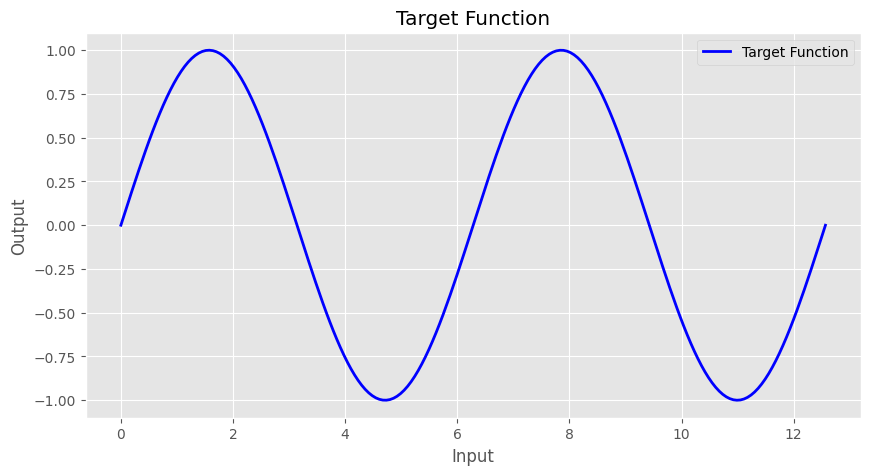

In [195]:
# Generation of vertical input vector
X = np.linspace(domain_start, domain_end, sample_size).reshape(-1, 1)

# Generation of horizontal target vector
Y = target_function(X)

# Plotting the target function
plt.figure(figsize=(10, 5))
plt.plot(X, Y, label="Target Function", color="blue", linewidth=2)
plt.title("Target Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.show()

### Neural Network via Batch Gradient Descent

In [196]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, lr, act_func, act_deriv):
        self.lr = lr
        self.act_func = act_func
        self.act_deriv = act_deriv

        # Initializing weights and with small values
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1

        # Initializing biases with values between [-1, 1]
        self.b1 = np.random.uniform(-1, 1, (1, hidden_size))
        self.b2 = np.random.uniform(-1, 1, (1, output_size))

    def forward(self, X):
        # Input Layer -> Hidden Layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.act_func(self.z1)

        # Hidden Layer -> Output Layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        return self.z2

    def backward(self, X, y, output):
        # The batch size is equal to the sample size
        batch_size = X.shape[0]

        # Defining the error
        error = output - y

        # Gradient for output layer
        d_output = error * 1

        dW2 = np.dot(self.a1.T, d_output) / batch_size
        db2 = np.sum(d_output, axis=0, keepdims=True) / batch_size

        # Gradient for hidden layer
        d_hidden = np.dot(d_output, self.W2.T) * self.act_deriv(self.z1)

        dW1 = np.dot(X.T, d_hidden) / batch_size
        db1 = np.sum(d_hidden, axis=0, keepdims=True) / batch_size

        # Gradient descent step
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

        # Mean squared error
        return np.mean(np.square(error))

### Model Training

In [197]:
# Model Instantiation
model = NeuralNetwork(input_size=1, hidden_size=hidden_neurons, output_size=1, lr=learning_rate, act_func=selected_activation, act_deriv=selected_derivative)

loss_history = []

# Intermediate Training
print(f"Training for {intermediate_generations} generations...")
for i in range(intermediate_generations):
    # Forward pass
    prediction = model.forward(X)

    # Backward pass
    loss = model.backward(X, Y, prediction)
    loss_history.append(loss)

    # Print the current loss in given steps
    current_loss_step = 10000
    if i % current_loss_step == 0:
        print(f"Current Loss: {loss:.5f}")

# Intermediate Prediction
print("Intermediate Training Complete.")
prediction_intermediate = model.forward(X)

# Final Training
remaining_generations = total_generations - intermediate_generations
print(f"Training for further {remaining_generations} generations...")

for i in range(remaining_generations):
    # Forward pass
    prediction = model.forward(X)

    # Backward pass
    loss = model.backward(X, Y, prediction)
    loss_history.append(loss)

    # Print the current loss in given steps
    current_loss_step = 10000
    if i % current_loss_step == 0:
        print(f"Current Loss: {loss:.5f}")

# Final Prediction
prediction_final = model.forward(X)
print("Training Complete.")

Training for 50000 generations...
Current Loss: 0.61476
Current Loss: 0.41228
Current Loss: 0.40325
Current Loss: 0.35000
Current Loss: 0.22416
Intermediate Training Complete.
Training for further 150000 generations...
Current Loss: 0.12981
Current Loss: 0.09715
Current Loss: 0.07905
Current Loss: 0.06720
Current Loss: 0.05834
Current Loss: 0.05203
Current Loss: 0.04844
Current Loss: 0.04603
Current Loss: 0.04383
Current Loss: 0.04163
Current Loss: 0.03937
Current Loss: 0.03701
Current Loss: 0.03454
Current Loss: 0.04127
Current Loss: 0.03988
Training Complete.


### Visualizing Approximation

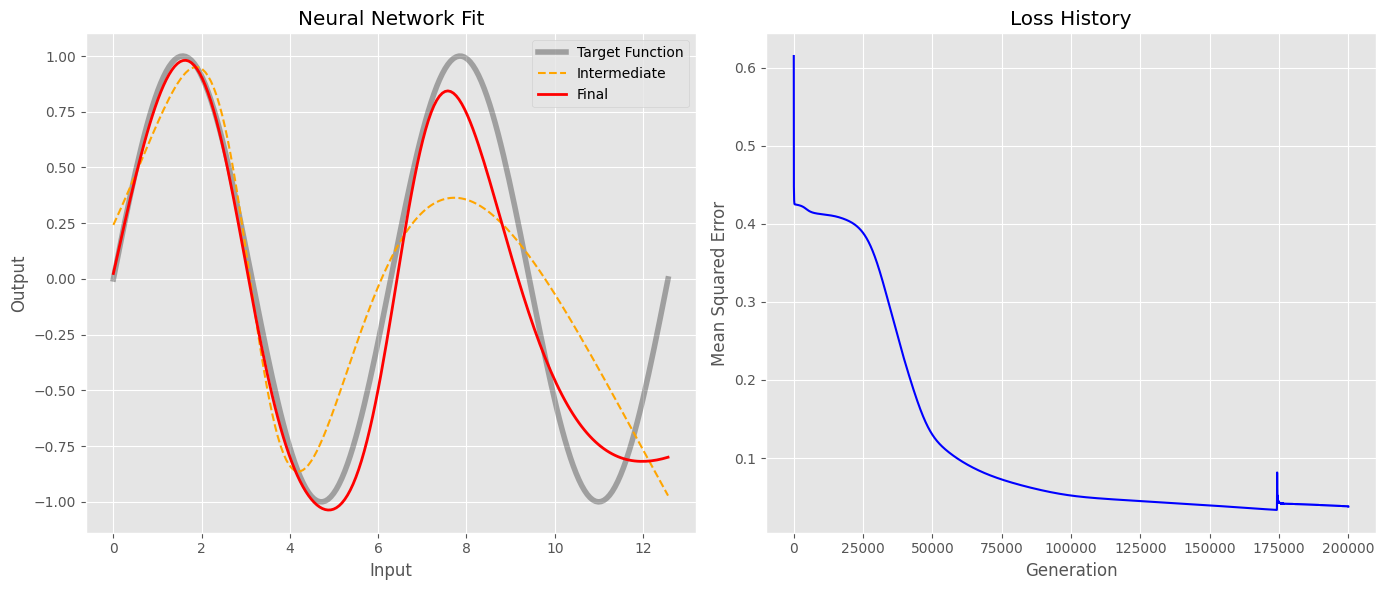

In [198]:
plt.figure(figsize=(14, 6))

# Plotting the function approximation
plt.subplot(1, 2, 1)
plt.plot(X, Y, label="Target Function", color="black", alpha=0.3, linewidth=4)
plt.plot(X, prediction_intermediate, label="Intermediate", color="orange", linestyle="--")
plt.plot(X, prediction_final, label="Final", color="red", linewidth=2)
plt.title("Neural Network Fit")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()

# Plotting the learning curve
plt.subplot(1, 2, 2)
plt.plot(loss_history, color="blue")
plt.title("Loss History")
plt.xlabel("Generation")
plt.ylabel("Mean Squared Error")

plt.tight_layout()
plt.show()